In [52]:
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
# warning 메세지 숨기기
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 문제 해결 : matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [53]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [54]:
# train, test : keras.datasets
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [55]:
# train과 valid 분리
from sklearn.model_selection import train_test_split

# test 데이터 정규화
train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [56]:
# Model 함수 구현
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [57]:
model = model_fn()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 100)               78500     
                                                                 
 dense_25 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [58]:
# 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5322 - accuracy: 0.8131
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3936 - accuracy: 0.8582
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3551 - accuracy: 0.8718
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3348 - accuracy: 0.8798
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3222 - accuracy: 0.8852


### 손실곡선

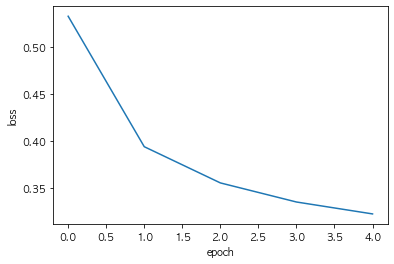

In [59]:
plt.plot(history.history['loss'])

plt.xlabel('epoch') # 0부터 4까지 5개
plt.ylabel('loss')

plt.show()

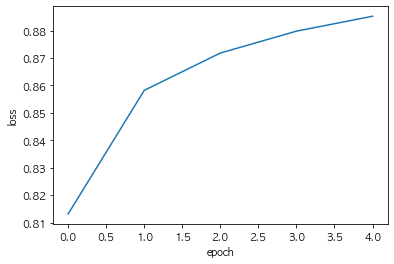

In [60]:
plt.plot(history.history['accuracy'])

plt.xlabel('epoch') # 0부터 4까지 5개
plt.ylabel('loss')

plt.show()

---
### 반복훈련의 증가

In [68]:
# 반복 훈련
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5257 - accuracy: 0.8141
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3924 - accuracy: 0.8590
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3561 - accuracy: 0.8721
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3341 - accuracy: 0.8789
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3181 - accuracy: 0.8875
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3081 - accuracy: 0.8902
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2981 - accuracy: 0.8933
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2891 - accuracy: 0.8985
Epoch 9/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9009
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.276

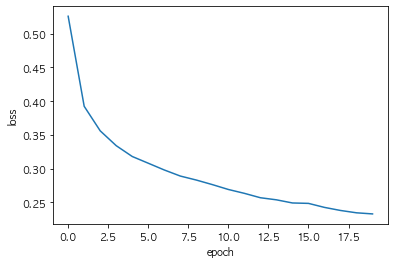

In [69]:
plt.plot(history.history['loss'])

plt.xlabel('epoch') # 0부터 4까지 5개
plt.ylabel('loss')

plt.show()

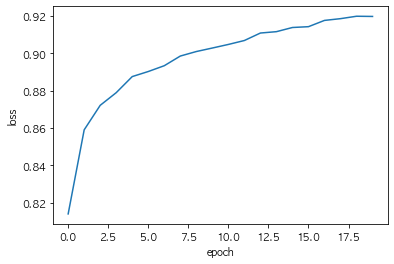

In [70]:
plt.plot(history.history['accuracy'])

plt.xlabel('epoch') # 0부터 4까지 5개
plt.ylabel('loss')

plt.show()

---
### 검증 손실
: 검증 세트에 대한 정확도를 파악하기 위해 validation data를 사용한다.

In [71]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5325 - accuracy: 0.8142 - val_loss: 0.4219 - val_accuracy: 0.8513
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3952 - accuracy: 0.8583 - val_loss: 0.3766 - val_accuracy: 0.8644
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3555 - accuracy: 0.8704 - val_loss: 0.4075 - val_accuracy: 0.8562
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3361 - accuracy: 0.8793 - val_loss: 0.3450 - val_accuracy: 0.8801
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3209 - accuracy: 0.8855 - val_loss: 0.3705 - val_accuracy: 0.8805
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3090 - accuracy: 0.8910 - val_loss: 0.3497 - val_accuracy: 0.8838
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2992 - accuracy: 0.8946 - val_loss: 0.3663 - val_accuracy:

In [72]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

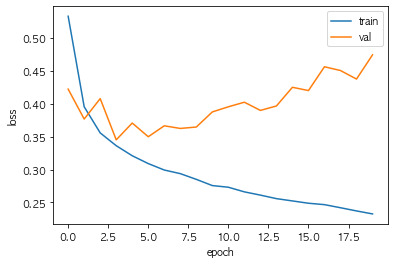

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch') # 0부터 4까지 5개
plt.ylabel('loss')
plt.legend(['train','val'])

plt.show()

> 훈련셋은 epoch가 증가함에 따라 손실이 적어지나,   
> 검증셋은 초반엔 손실이 적어지다가 진행할수록 오히려 손실율이 증가한다.    
> 이 모델은 훈련셋에만 정확도가 높고 검증셋에는 적합하지 않은 과대적합 모델이다.

---
### Optimizer 사용하기

In [74]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5242 - accuracy: 0.8175 - val_loss: 0.4149 - val_accuracy: 0.8497
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3935 - accuracy: 0.8589 - val_loss: 0.3691 - val_accuracy: 0.8683
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3542 - accuracy: 0.8717 - val_loss: 0.3668 - val_accuracy: 0.8643
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3284 - accuracy: 0.8802 - val_loss: 0.3557 - val_accuracy: 0.8703
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3083 - accuracy: 0.8882 - val_loss: 0.3622 - val_accuracy: 0.8709
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2903 - accuracy: 0.8932 - val_loss: 0.3282 - val_accuracy: 0.8788
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2792 - accuracy: 0.8964 - val_loss: 0.3483 - val_accuracy:

In [75]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

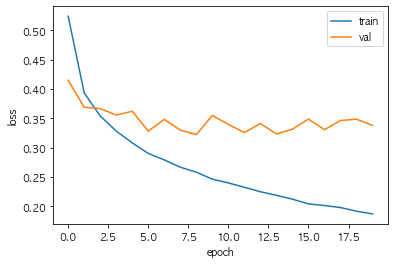

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch') # 0부터 4까지 5개
plt.ylabel('loss')
plt.legend(['train','val'])

plt.show()

> 훈련셋은 epoch가 증가함에 따라 손실이 적어지나,   
> 검증셋은 초반엔 손실이 적어지다가 진행할수록 오히려 손실율이 증가한다.    
> 이 모델은 훈련셋에만 정확도가 높고 검증셋에는 적합하지 않은 과대적합 모델이다.   
> Optimizer(최적화 알고리즘)을 사용한 것이 조금 개선됐지만, 여전히 검증손실에 대해 심히 과대적합이다

---
### Drop Out
- 규제
- 신경망 모델에만 있음
- 훈련시에만 각 sample을 처리할 때 은닉층의 임의 node를 계산에 포함시키지 않는다.

In [77]:
# model에 dropout 추가
model = model_fn(keras.layers.Dropout(0.3)) # drop out 30 %
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 100)               78500     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_35 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target)
)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5907 - accuracy: 0.7914 - val_loss: 0.4405 - val_accuracy: 0.8439
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4385 - accuracy: 0.8433 - val_loss: 0.3851 - val_accuracy: 0.8616
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4059 - accuracy: 0.8520 - val_loss: 0.3677 - val_accuracy: 0.8658
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3838 - accuracy: 0.8590 - val_loss: 0.3612 - val_accuracy: 0.8681
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3651 - accuracy: 0.8664 - val_loss: 0.3526 - val_accuracy: 0.8723
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3520 - accuracy: 0.8706 - val_loss: 0.3501 - val_accuracy: 0.8692
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3442 - accuracy: 0.8722 - val_loss: 0.3429 - val_accuracy:

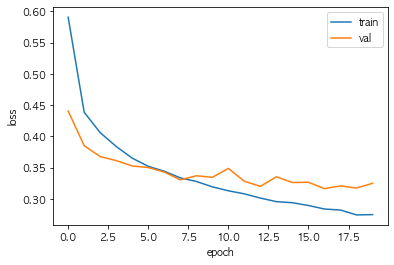

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch') # 0부터 4까지 5개
plt.ylabel('loss')
plt.legend(['train','val'])

plt.show()

> epoch가 10일 경우가 최적인 것 같다.(train-test 차이가 적으면서 loss값도 작음)   
> 기본적으로 훈련세트의 손실이 검증세트보다 적게 나오는 epoch의 개수를 선택하자.

---
### model 저장 및 복원
- hdf5 format으로 저장

In [ ]:
# model 저장하기
model.save('../data/model_whole.h5')

In [ ]:
# model 복원
model = keras.models.load_model('../data/model_whole.h5')

In [80]:
# 사용
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3249 - accuracy: 0.8858


[0.3249111473560333, 0.8858333230018616]

---
# Callbacks
- 훈련 수행시 손실값이 제일 작은 함수를 저장한다. (굉장히 편함)

In [ ]:
model = model_fn(keras.layers.Dropout(0.3)) # drop out 30 %
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('../data/best_model.h5')
model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb]
)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5936 - accuracy: 0.7917 - val_loss: 0.4497 - val_accuracy: 0.8351
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4401 - accuracy: 0.8429 - val_loss: 0.3754 - val_accuracy: 0.8653
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4053 - accuracy: 0.8527 - val_loss: 0.3574 - val_accuracy: 0.8694
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3814 - accuracy: 0.8604 - val_loss: 0.3593 - val_accuracy: 0.8655
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3667 - accuracy: 0.8663 - val_loss: 0.3462 - val_accuracy: 0.8717
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3540 - accuracy: 0.8717 - val_loss: 0.3391 - val_accuracy: 0.8737
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3447 - accuracy: 0.8745 - val_loss: 0.3445 - val_accuracy:

In [81]:
model = keras.models.load_model('../data/best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3817 - accuracy: 0.8611


[0.3817494809627533, 0.8610833287239075]

---
# Early Stopping(조기 종료)
- Callbacks처럼 끝까지 기다리는 것이 아니고, hyper parameter을 선정하여 한계값을 정해 실행한다.
> hyper parameter 값 만큼 참는다.(용인한다.)

In [82]:
model = model_fn(keras.layers.Dropout(0.3)) # drop out 30 %
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('../data/best_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# restore_best_weight : 최적의 가중치를 저장해둔다.
history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5912 - accuracy: 0.7919 - val_loss: 0.4200 - val_accuracy: 0.8472
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4401 - accuracy: 0.8429 - val_loss: 0.4010 - val_accuracy: 0.8515
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4015 - accuracy: 0.8538 - val_loss: 0.3825 - val_accuracy: 0.8568
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3803 - accuracy: 0.8604 - val_loss: 0.3520 - val_accuracy: 0.8712
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3664 - accuracy: 0.8655 - val_loss: 0.3460 - val_accuracy: 0.8737
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3560 - accuracy: 0.8694 - val_loss: 0.3427 - val_accuracy: 0.8732
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3427 - accuracy: 0.8734 - val_loss: 0.3323 - val_accuracy:

In [83]:
# 몇번째 epoch에서 stop 되었는가?
early_stopping_cb.stopped_epoch

10

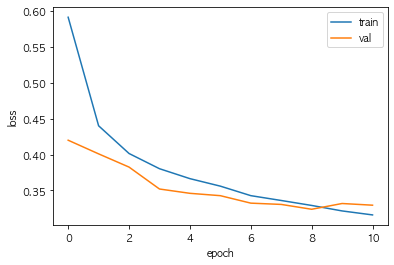

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch') # 0부터 4까지 5개
plt.ylabel('loss')
plt.legend(['train','val'])

plt.show()